# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  

   Dataset yang digunakan pada proyek ini diperoleh dari UCI Machine Learning Repository, sebuah repositori dataset publik yang banyak digunakan dalam penelitian dan pengembangan sistem machine learning.
   
   UCI Machine Learning Repository menyediakan berbagai dataset berkualitas tinggi yang telah melalui proses kurasi dan dokumentasi yang baik, sehingga sangat sesuai untuk keperluan eksperimen, evaluasi model, serta implementasi sistem machine learning berbasis produksi.

   Dataset yang digunakan dapat diakses melalui tautan berikut:
   https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls

   Dataset ini bersifat open data, dapat digunakan secara bebas untuk keperluan akademik maupun penelitian, dan tidak memerlukan autentikasi khusus untuk mengaksesnya.

2. **Deskripsi Dataset**

   Dataset **Default of Credit Card Clients** berisi data nasabah kartu kredit di Taiwan yang digunakan untuk memprediksi kemungkinan terjadinya **gagal bayar (default payment)** pada periode pembayaran berikutnya.
   
   Dataset ini pertama kali diperkenalkan dalam konteks penelitian manajemen risiko kredit dan telah banyak digunakan sebagai benchmark dalam studi klasifikasi dan credit scoring.
   
   Setiap baris data merepresentasikan satu nasabah kartu kredit, sedangkan setiap kolom merepresentasikan karakteristik finansial, demografis, serta riwayat pembayaran nasabah tersebut.

3. **Tujuan Penggunaan Dataset**

   Tujuan utama penggunaan dataset ini dalam proyek adalah untuk **membangun sistem machine learning end-to-end** yang mampu:
   *   Memprediksi apakah seorang nasabah akan mengalami default pembayaran kartu kredit pada bulan berikutnya
   *   Menghasilkan model klasifikasi biner yang stabil, terukur, dan dapat dipantau performanya
   *   Menjadi studi kasus implementasi MLOps mulai dari eksperimen, pelatihan model, deployment, hingga monitoring

   Masalah yang diselesaikan pada dataset ini dikategorikan sebagai:
   
   **Binary Classification Problem**
   
   dengan dua kelas target, yaitu:

   *   0 : Nasabah tidak mengalami default
   *   1 : Nasabah mengalami default

4. **Karakteristik Dataset**
   
   Beberapa karakteristik utama dari dataset ini adalah sebagai berikut:

   *   **Jumlah observasi**: 30.000 data nasabah
   *   **Jumlah fitur**: 24 fitur input dan 1 target
   *   **Jenis data**:
       * Data numerik (limit kredit, tagihan, jumlah pembayaran)
       * Data kategorikal diskrit (jenis kelamin, pendidikan, status pernikahan)
   *   **Target variabel**: default payment next month
   
   Dataset ini mencerminkan data dunia nyata yang kompleks, sehingga sangat cocok digunakan untuk menguji pipeline preprocessing, eksperimen model, serta sistem monitoring performa model.

5. **Alasan Pemilihan Dataset**

   Dataset ini dipilih karena memenuhi beberapa kriteria penting dalam pengembangan sistem machine learning berbasis produksi, antara lain:
   1.   Memiliki ukuran dataset yang cukup besar untuk eksperimen dan evaluasi model
   2. Mengandung kombinasi fitur numerik dan kategorikal
   3. Relevan dengan permasalahan nyata di industri keuangan
   4. Sering digunakan sebagai referensi akademik sehingga memudahkan validasi pendekatan
   5. Cocok untuk implementasi pipeline MLOps seperti versioning data, tracking eksperimen, CI/CD, dan monitoring model

6. **Ringkasan**

   Secara keseluruhan, dataset Default of Credit Card Clients dari UCI Machine Learning Repository dipilih sebagai dasar pengembangan proyek ini karena kualitas data yang baik, relevansi masalah, serta kesesuaiannya untuk mengimplementasikan sistem machine learning yang lengkap dan siap produksi.





# **2. Import Library**

Pada tahap ini, saya meng-install beberapa dependensi yang akan digunakan untuk membangun sistem. Ini diperlukan untuk menunjang beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning pada Google Colab

In [16]:
!pip install -q \
    mlflow==2.19.0 \
    dagshub \
    pyngrok \
    fastapi \
    uvicorn \
    prometheus-client

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.4/27.4 MB 92.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 69.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.3/261.3 kB 24.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.6/140.6 kB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 134.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 774.7/774.7 kB 54.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 18.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [17]:
# Core
import os
import sys
import json
import time
import warnings
from datetime import datetime
warnings.filterwarnings("ignore")

# Data
import numpy as np
import pandas as pd

# Visualisasi
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# Statistik
from scipy import stats

# ML
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

# MLflow & DagsHub
import mlflow
import mlflow.sklearn
import dagshub

# Serving & Monitoring
from fastapi import FastAPI
import uvicorn
from prometheus_client import Counter, Gauge, Histogram, start_http_server

# Networking
import requests
from pyngrok import ngrok

print("✅ Semua library siap digunakan")

✅ Semua library siap digunakan


# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

### **3.1 Tujuan Tahap Memuat Dataset**

Tahap ini bertujuan untuk memuat dataset ke dalam lingkungan kerja Google Colab dan memastikan bahwa data berhasil dibaca dengan benar. Selain itu, tahap ini juga digunakan untuk memahami struktur awal dataset, seperti jumlah baris, kolom, serta tipe data yang tersedia sebelum dilakukan analisis dan preprocessing lebih lanjut.

Dataset yang digunakan pada proyek ini merupakan data terstruktur (structured data) dalam format spreadsheet (.xls), sehingga dapat langsung dibaca menggunakan pustaka pandas.

### **3.2 Memuat Dataset dari Sumber Eksternal (UCI Repository)**

Dataset dimuat langsung dari URL resmi UCI Machine Learning Repository menggunakan fungsi read_excel() dari pustaka pandas.

In [19]:
# URL dataset
dataset_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls"

# Load dataset
df = pd.read_excel(dataset_url, header=1)

print("✅ Dataset berhasil dimuat")


✅ Dataset berhasil dimuat


### **3.3 Menampilkan Beberapa Baris Awal Dataset**

Untuk memastikan bahwa dataset telah dimuat dengan benar dan untuk memahami struktur data, dilakukan peninjauan terhadap beberapa baris awal dataset.

In [20]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


### **3.4 Memeriksa Ukuran Dataset**

Langkah berikutnya adalah memeriksa dimensi dataset untuk mengetahui jumlah baris (observasi) dan kolom (fitur) yang tersedia.

In [21]:
df.shape

(30000, 25)

**Interpretasi**:
* Baris merepresentasikan jumlah nasabah kartu kredit
* Kolom merepresentasikan fitur dan target variabel

### **3.5 Memeriksa Informasi Umum Dataset**

Untuk memahami tipe data setiap kolom serta memastikan tidak terdapat error pada proses pemuatan data, digunakan fungsi info().

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_0                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

**Informasi ini penting untuk**:
* Menentukan strategi preprocessing
* Mengidentifikasi fitur numerik dan kategorikal
* Mendeteksi potensi masalah seperti tipe data yang tidak sesuai

### **3.6 Memeriksa Missing Values**

Selanjutnya dilakukan pemeriksaan nilai kosong (missing values) pada setiap kolom.

In [23]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


Hasil pemeriksaan ini akan menjadi dasar dalam menentukan metode penanganan missing values pada tahap preprocessing.

### **3.7 Ringkasan Tahap Memuat Dataset**

Berdasarkan hasil pemuatan dan pemeriksaan awal dataset, dapat disimpulkan bahwa:
* Dataset berhasil dimuat tanpa error
* Data memiliki struktur tabular yang jelas
* Dataset siap untuk dilakukan analisis eksploratif (EDA)
* Tidak terdapat kendala dalam format data yang digunakan

Tahap ini menandai bahwa dataset telah siap untuk dianalisis lebih lanjut pada tahap Exploratory Data Analysis (EDA).

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

### **4.1 Tujuan Exploratory Data Analysis**

Exploratory Data Analysis (EDA) dilakukan untuk memperoleh pemahaman awal yang mendalam terhadap karakteristik dataset. Melalui EDA, dapat diketahui pola distribusi data, hubungan antar fitur, potensi ketidakseimbangan kelas, serta anomali atau nilai ekstrem yang dapat memengaruhi kinerja model machine learning.

Hasil dari EDA ini akan menjadi dasar dalam menentukan strategi preprocessing, pemilihan fitur, serta pendekatan pemodelan yang sesuai.

### **4.2 Identifikasi Target Variabel**

Target variabel pada dataset ini adalah kolom:

`default payment next month`

Agar lebih mudah digunakan pada tahap selanjutnya, kolom ini akan diberi nama ulang menjadi `default`.

In [25]:
df = df.rename(columns={"default payment next month": "default"})

### **4.3 Distribusi Target (Class Balance)**

Analisis ini dilakukan untuk mengetahui apakah dataset mengalami ketidakseimbangan kelas (class imbalance).

In [26]:
# Distribusi target
df["default"].value_counts()

,count
default,
0,23364
1,6636


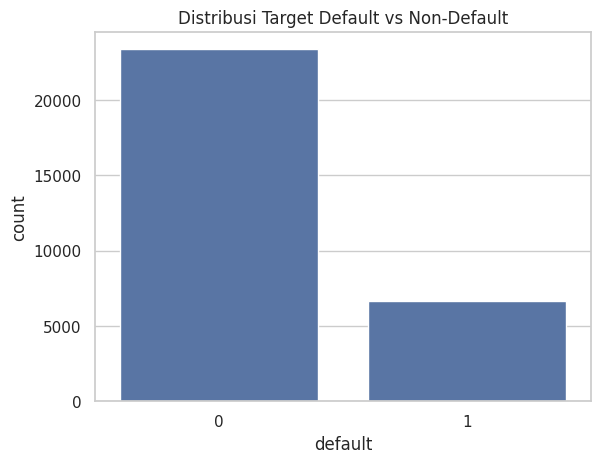

In [27]:
# Visualisasi distribusi target
sns.countplot(x="default", data=df)
plt.title("Distribusi Target Default vs Non-Default")
plt.show()

**Insight**:
* Nilai 0 merepresentasikan nasabah yang tidak mengalami default
* Nilai 1 merepresentasikan nasabah yang mengalami default
* Informasi ini penting untuk menentukan metrik evaluasi model (misalnya ROC-AUC)

### **4.4 Analisis Statistik Deskriptif**

Statistik deskriptif digunakan untuk memahami sebaran nilai numerik dalam dataset.

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


Analisis ini membantu dalam:
* Mengidentifikasi rentang nilai fitur
* Mendeteksi potensi outlier
* Menentukan kebutuhan scaling data

### **4.5 Analisis Distribusi Fitur Numerik**
**4.5.1 Distribusi Umur Nasabah**

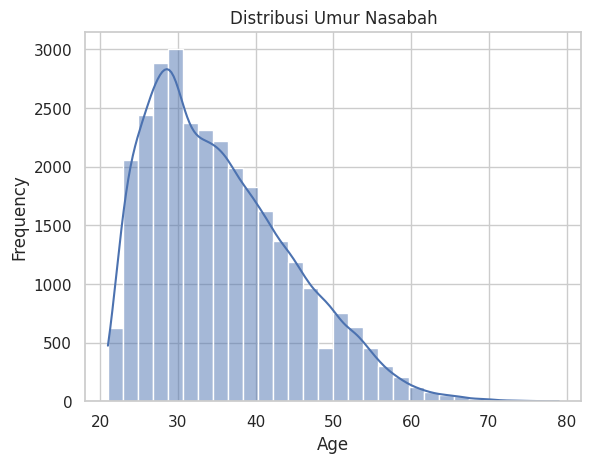

In [29]:
sns.histplot(df["AGE"], bins=30, kde=True)
plt.title("Distribusi Umur Nasabah")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

**Insight**:
* Mayoritas nasabah berada pada rentang usia produktif
* Distribusi tidak sepenuhnya normal, sehingga scaling diperlukan

**4.5.2 Distribusi Limit Kredit**

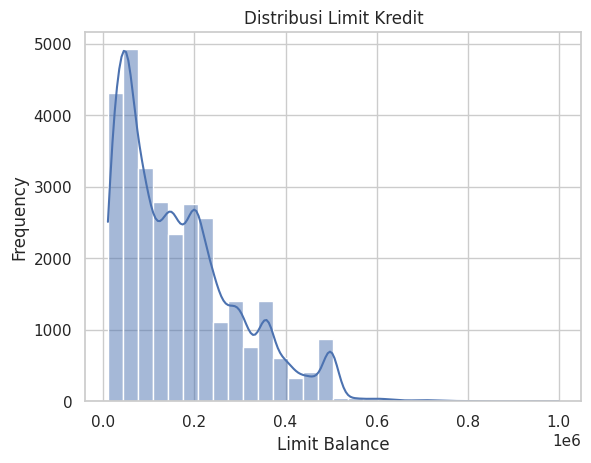

In [30]:
sns.histplot(df["LIMIT_BAL"], bins=30, kde=True)
plt.title("Distribusi Limit Kredit")
plt.xlabel("Limit Balance")
plt.ylabel("Frequency")
plt.show()

**Insight**:
* Distribusi cenderung skewed
* Scaling dan/atau transformasi dapat dipertimbangkan

### **4.6 Hubungan Fitur terhadap Target**
**4.6.1 Limit Kredit terhadap Status Default**

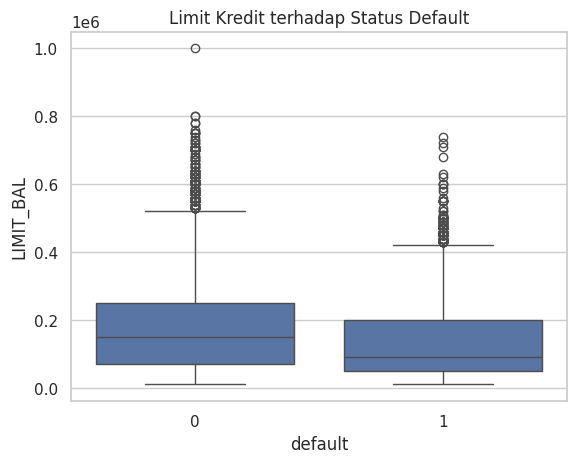

In [31]:
sns.boxplot(x="default", y="LIMIT_BAL", data=df)
plt.title("Limit Kredit terhadap Status Default")
plt.show()

**Insight**:
* Nasabah yang mengalami default cenderung memiliki limit kredit yang lebih rendah
* Fitur ini memiliki potensi diskriminatif terhadap target

**4.6.2 Umur terhadap Status Default**

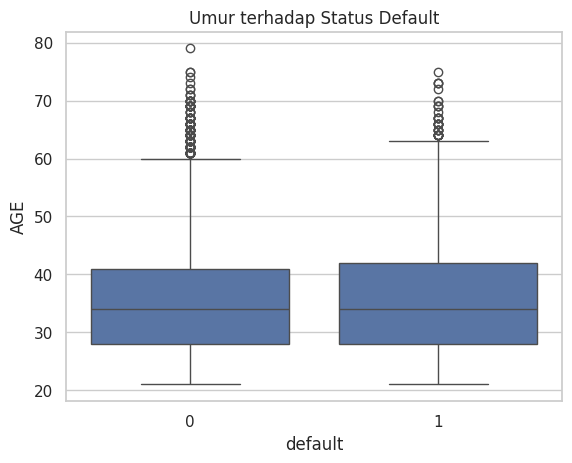

In [32]:
sns.boxplot(x="default", y="AGE", data=df)
plt.title("Umur terhadap Status Default")
plt.show()

**Insight**:
* Perbedaan distribusi usia antara kelas cukup tipis
* Fitur umur tetap relevan namun tidak dominan

### **4.7 Analisis Korelasi Antar Fitur**

Analisis korelasi dilakukan untuk melihat hubungan linear antar fitur numerik.

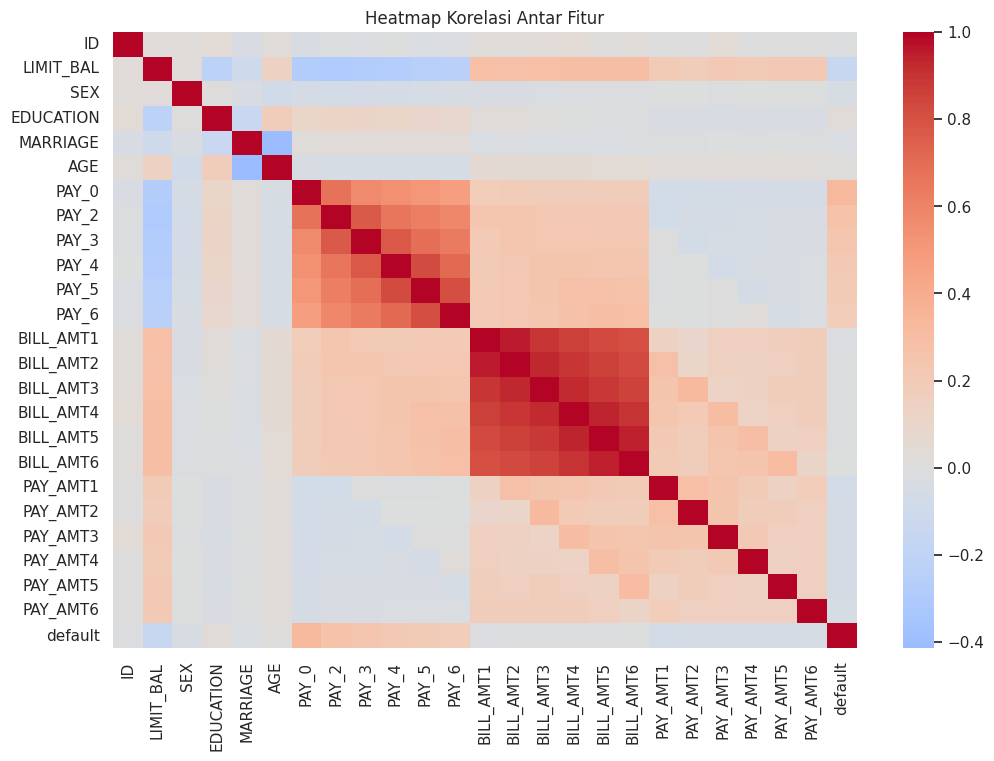

In [33]:
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, cmap="coolwarm", center=0)
plt.title("Heatmap Korelasi Antar Fitur")
plt.show()

**Insight**:
* Beberapa fitur tagihan dan pembayaran memiliki korelasi tinggi
* Potensi multikolinearitas perlu diperhatikan
* Model berbasis tree relatif lebih tahan terhadap korelasi tinggi

### **4.8 Pemeriksaan Missing Value dan Anomali**

In [34]:
df.isnull().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


**Insight**:
* Dataset tidak memiliki missing value eksplisit
* Namun tetap akan digunakan imputer pada preprocessing untuk menjaga robustness pipeline

### **4.9 Ringkasan Hasil EDA**

Berdasarkan hasil Exploratory Data Analysis, dapat disimpulkan bahwa:

1. Dataset bersifat tabular dan terstruktur dengan baik
2. Terdapat ketidakseimbangan kelas ringan pada target variabel
3. Beberapa fitur numerik memiliki distribusi skewed
4. Terdapat korelasi tinggi antar fitur tertentu
5. Dataset layak digunakan untuk pemodelan klasifikasi biner

Hasil EDA ini menjadi dasar untuk tahap Data Preprocessing, termasuk:
* Pemisahan fitur dan target
* Scaling fitur numerik
* Penanganan korelasi dan potensi outlier

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

### **5.1 Tujuan Data Preprocessing**

Data preprocessing merupakan tahap penting untuk memastikan kualitas dan konsistensi data sebelum digunakan dalam proses pelatihan model machine learning. Dataset mentah sering kali mengandung permasalahan seperti nilai kosong, distribusi data yang tidak seimbang, perbedaan skala antar fitur, atau nilai ekstrem (outlier) yang dapat berdampak negatif terhadap performa model.

Pada proyek ini, preprocessing dilakukan untuk:
* Membersihkan data dari potensi permasalahan
* Menyiapkan data agar kompatibel dengan algoritma machine learning
* Menghasilkan dataset akhir yang siap digunakan pada tahap pemodelan dan deployment

Karena dataset yang digunakan merupakan data terstruktur (tabular), maka tahapan preprocessing disesuaikan dengan karakteristik tersebut.

### **5.2 Pemisahan Fitur dan Target**

Langkah pertama adalah memisahkan fitur (input) dan target (label).

In [35]:
X = df.drop(columns=["default"])
y = df["default"]

print("Shape fitur:", X.shape)
print("Shape target:", y.shape)

Shape fitur: (30000, 24)
Shape target: (30000,)


### **5.3 Pemeriksaan dan Penanganan Missing Values**

Berdasarkan hasil EDA sebelumnya, dataset ini tidak memiliki missing values eksplisit. Namun, untuk menjaga robustness pipeline, tetap digunakan strategi imputasi median pada fitur numerik.

In [36]:
X.isnull().sum().sum()

np.int64(0)

In [37]:
imputer = SimpleImputer(strategy="median")

### **5.4 Penghapusan Data Duplikat**

Meskipun dataset ini tidak dilaporkan memiliki data duplikat, langkah ini tetap dilakukan sebagai bagian dari prosedur standar preprocessing.

In [38]:
print("Jumlah data sebelum menghapus duplikat:", X.shape[0])

df = df.drop_duplicates()

print("Jumlah data setelah menghapus duplikat:", df.shape[0])

Jumlah data sebelum menghapus duplikat: 30000
Jumlah data setelah menghapus duplikat: 30000


### **5.5 Identifikasi Fitur Numerik dan Kategorikal**

Dataset ini mengandung fitur numerik dan kategorikal diskrit (berupa angka). Untuk keperluan preprocessing, fitur dikelompokkan sebagai berikut:

In [39]:
numerical_features = X.columns.tolist()
categorical_features = []  # dataset ini tidak memiliki kategorikal berbentuk string

### **5.6 Train-Test Split**

Dataset dibagi menjadi data latih dan data uji untuk memastikan evaluasi model dilakukan secara objektif.

In [40]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Data latih:", X_train.shape)
print("Data uji:", X_test.shape)

Data latih: (24000, 24)
Data uji: (6000, 24)


### **5.7 Normalisasi / Standarisasi Fitur**

Karena fitur memiliki rentang nilai yang berbeda-beda, dilakukan standarisasi menggunakan StandardScaler agar setiap fitur memiliki distribusi yang sebanding.

In [41]:
scaler = StandardScaler()

X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

### **5.8 Deteksi dan Penanganan Outlier (Analisis)**

Outlier dianalisis menggunakan pendekatan IQR (Interquartile Range) pada fitur numerik utama seperti `LIMIT_BAL`.

In [42]:
Q1 = df["LIMIT_BAL"].quantile(0.25)
Q3 = df["LIMIT_BAL"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

(lower_bound, upper_bound)

(np.float64(-235000.0), np.float64(525000.0))

**Keputusan**:
* Outlier **tidak dihapus**, karena pada konteks keuangan nilai ekstrem masih valid secara domain
* Scaling sudah cukup untuk mengurangi dampaknya

### **5.9 Encoding Data Kategorikal**

Dataset ini tidak memiliki fitur kategorikal dalam bentuk teks. Seluruh fitur telah direpresentasikan dalam bentuk numerik, sehingga tidak diperlukan encoding tambahan seperti One-Hot Encoding atau Label Encoding.

### **5.10 Dataset Akhir Siap Latih**

Hasil preprocessing dikonversi kembali ke bentuk DataFrame dan digabungkan dengan target.

In [43]:
X_train_final = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_final = pd.DataFrame(X_test_scaled, columns=X.columns)

train_df = X_train_final.copy()
train_df["default"] = y_train.values

test_df = X_test_final.copy()
test_df["default"] = y_test.values

train_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,0.904395,-0.056866,0.80844,0.184523,0.856739,-0.264558,1.793311,1.780193,2.652046,1.911811,0.240260,0.256087,1.505547,1.745089,1.778869,1.891679,2.020839,2.096346,0.580657,-0.290332,-0.297820,0.086961,0.500397,0.048745,0
1,1.623947,-0.134081,0.80844,-1.077532,0.856739,-0.155804,0.902944,-0.722324,-0.697642,-1.530826,-1.537252,-1.489963,-0.695165,-0.691138,-0.685090,-0.673845,-0.662488,-0.652126,-0.344969,-0.290332,-0.297820,-0.318075,-0.316978,-0.292992,0
2,0.228817,-1.215090,-1.23695,0.184523,-1.059367,1.584260,0.902944,1.780193,0.139780,0.190493,0.240260,0.256087,-0.556800,-0.576836,-0.561615,-0.547887,-0.526789,-0.510492,-0.348128,-0.227081,-0.233069,-0.298554,-0.296710,-0.236970,0
3,0.845609,0.406423,0.80844,-1.077532,0.856739,-0.699574,0.012576,0.111849,0.139780,0.190493,0.240260,0.256087,2.119190,2.287237,2.460102,2.738001,1.509166,1.613118,0.215287,0.154056,0.152526,0.000642,0.008643,0.043143,1
4,-0.419683,1.101358,0.80844,-1.077532,0.856739,-0.373312,0.902944,-1.556496,-0.697642,0.190493,0.240260,-1.489963,-0.695165,-0.691886,-0.680324,-0.668755,-0.666365,-0.656089,-0.348251,-0.274236,-0.297820,-0.318075,-0.316978,-0.225765,0


### **5.11 Menyimpan Dataset Hasil Preprocessing**

Dataset hasil preprocessing disimpan untuk digunakan pada tahap pemodelan dan pipeline MLOps selanjutnya.

In [44]:
train_df.to_csv("credit_train_preprocessed.csv", index=False)
test_df.to_csv("credit_test_preprocessed.csv", index=False)

print("✅ Dataset hasil preprocessing berhasil disimpan")

✅ Dataset hasil preprocessing berhasil disimpan


### **5.12 Ringkasan Tahap Data Preprocessing**

Berdasarkan tahapan preprocessing yang telah dilakukan, dapat disimpulkan bahwa:
1. Dataset telah dibersihkan dan dipersiapkan dengan baik
2. Tidak terdapat missing value dan data duplikat
3. Fitur telah distandarisasi untuk meningkatkan stabilitas model
4. Dataset akhir telah dibagi menjadi data latih dan data uji
5. Data siap digunakan pada tahap pemodelan machine learning

Tahap ini menandai selesainya Kriteria 1: Melakukan Eksperimen terhadap Dataset Pelatihan.